In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# K-Nearest Neighbors (kNN)

$k$-Nearest neighbors is one of the simplest predictive models there is. 
The only things it requires are:
   1. Some notion of distance.
   2. An assumption that points that are close to one another are similar.

Let's say we've picked a number  $𝑘$  (like 3 or 5). Then, when we want to classify some new data point, we find the  𝑘  nearest labeled points and let them vote on the new ouput.

**Contents**

- [knn implementation](#1.knn-implementation)
- [Example: the MNIST dataset](#2.-Example:-the-MNIST-dataset)
- [Choosing k](#3.-Choosing-k)

## 1. knn implementation

In [2]:
def knn_classifier(k,X,y,X_new):
    'one-loop version'
    '''
    INPUT
    k: number of neighbors
    X,y : data points and their classes
    X_new : points to be classified
    
    OUTPUT:
    y_pred: class predictions
    '''
    
    # number of points
    m = X.shape[0] # number of rows of X (number of points)
    m_new = X_new.shape[0] # number of rows of X_new (number of new points)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # initialize y_pred vector
    y_pred = np.zeros(m_new)

    for i in range(m_new):
        # distances from X_new[i] to data points X
        dist = np.linalg.norm(X-X_new[i], axis=1)
        # k nearest kneighbors
        knn = np.argsort(dist)[0:k] 
        # labels
        nearest_labels = y[knn]
        # majority vote; break ties by choosing the smaller label.                          
        y_pred[i] = np.argmax(np.bincount(nearest_labels, minlength=n_classes))
    return y_pred

In [13]:
def knn_classifier(X,y,X_new,k):
    'no-loop version'
    
    m = X.shape[0] # number of rows of X (number of points)
    m_new = X_new[0] # number of rows of X_new (number of new points)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # distance matrix
    dist = np.sqrt(np.square(X_new).sum(1).reshape([-1,1])+np.square(X).sum(1).reshape([1,-1])-2*X_new.dot(X.T))
    
    # k nearest neighbor
    knn = np.argsort(dist,axis=1)[:,0:k]
    
    # labels
    nearest_labels = y[knn]
    # prediction
    y_pred = np.argmax(np.apply_along_axis(np.bincount, 1,nearest_labels, minlength=n_classes),axis=1)
    
    return y_pred

In [3]:
def knn_classifier(k,X,y,X_new, weights='uniform'):
    'no-loop version'
    
    m,_ = X.shape
    m_new,_ = X_new.shape
    
    # number of classes
    n_classes = len(np.unique(y))
    
    
    
    # distance matrix
    dist = np.sqrt(np.square(X_new).sum(axis=1).reshape([m_new,1])+np.square(X).sum(axis=1).reshape([1,m])-2*X_new.dot(X.T))
    
    # k nearest neighbor
    knn = np.argsort(dist,axis=1)[:,0:k]
    
    y_pred = np.zeros(m_new)
    for i in range(m_new):
        # labels
        nearest_labels = y[knn[i]]
        # weights
        if weights=='uniform':
            w = np.ones(k)
        elif weights=='distance':
            w=1/dist[i,knn[i]]
        # prediction
        y_pred[i] = np.argmax(np.bincount(nearest_labels, minlength=n_classes, weights=w))
    
    return y_pred

## 2. Example: the MNIST (handwritten digits) dataset

In [4]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits.csv'
data = pd.read_csv(url)
data.head(5) # display first 5 rows of the dataset

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [5]:
data.shape

(5000, 785)

In [6]:
X = data.iloc[:,0:784].to_numpy() # pixels
y = data['label'].to_numpy() # labels

In [7]:
X.shape

(5000, 784)

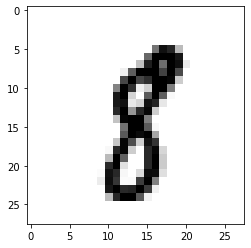

In [8]:
# each row is a 28 x 28 pixels image of a hand-written digit
row = 300 # grab a row
plt.imshow(X[row].reshape(28,28), cmap='binary')

In [9]:
y[row]

8

In [10]:
# load test data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits_test.csv'
test_data = pd.read_csv(url)

In [11]:
test_data.shape

(2000, 785)

In [12]:
X_test = test_data.iloc[:,0:784].to_numpy() # pixels
y_test = test_data['label'].to_numpy() # labels

In [13]:
# let's use the knn method to predict the class of the X_test points
y_test_pred = knn_classifier(10,X,y,X_test)

In [14]:
'confusion matrix'
n_classes = 10
C = np.zeros((n_classes,n_classes))
for i in range(n_classes):
    for j in range(n_classes):
        C[i,j] = sum(y_test_pred[y_test==i]==j)
C

array([[202.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.],
       [  0., 222.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   7., 173.,   1.,   0.,   0.,   0.,   2.,   1.,   0.],
       [  0.,  12.,   6., 171.,   0.,   1.,   1.,   2.,   2.,   0.],
       [  0.,   7.,   0.,   0., 183.,   0.,   1.,   0.,   0.,  13.],
       [  1.,   2.,   0.,   2.,   0., 172.,   4.,   0.,   3.,   1.],
       [  2.,   2.,   0.,   0.,   0.,   1., 189.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   0.,   2.,   0.,   0., 201.,   0.,   6.],
       [  2.,  15.,   0.,   6.,   2.,   1.,   4.,   1., 145.,   7.],
       [  0.,   2.,   0.,   4.,   2.,   0.,   0.,   3.,   0., 204.]])

In [15]:
# percentage of correct classification
100*np.sum(y_test==y_test_pred)/len(y_test)

93.1

## 3. Choosing weights and k

We'll split the data (X,y) into a training set and a validation set 

In [16]:
# shuffle the data
permutation = np.random.permutation(X.shape[0]) 
X = X[permutation]
y = y[permutation]

In [28]:
# split data into train and validation sets
X_train, y_train = X[0:3000], y[0:3000]
X_val, y_val = X[3000:5000], y[3000:5000]

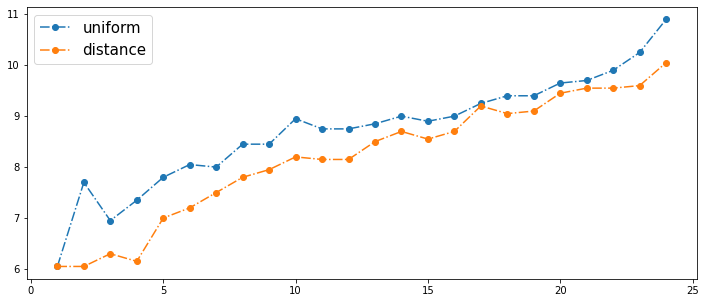

In [30]:
weights = ['uniform', 'distance']
k_list = np.arange(1,25)

plt.figure(figsize=(12,5))

for i in range(len(weights)):
    pct_incorrect = np.zeros(len(k_list))
    for j in range(len(k_list)):
        y_val_pred = knn_classifier(k_list[j],
                                    X_train,y_train,X_val,
                                    weights=weights[i])
        # percentage of incorrect classification
        pct_incorrect[j] = 100*np.sum(y_val!=y_val_pred)/len(y_val)
    plt.plot(k_list, pct_incorrect,'o-.', label=weights[i])
plt.legend(fontsize=15)

In [18]:
k_list = np.arange(1,20)
pct_incorrect = np.zeros(len(k_list))
for i in range(len(k_list)):
    k = k_list[i]
    y_val_pred = knn_classifier(k,X_train,y_train,X_val)
    # percentage of incorrect classification
    pct_incorrect[i] = 100*np.sum(y_val!=y_val_pred)/len(y_val)

Text(0.5, 1.0, 'Percentage of incorrect classifications')

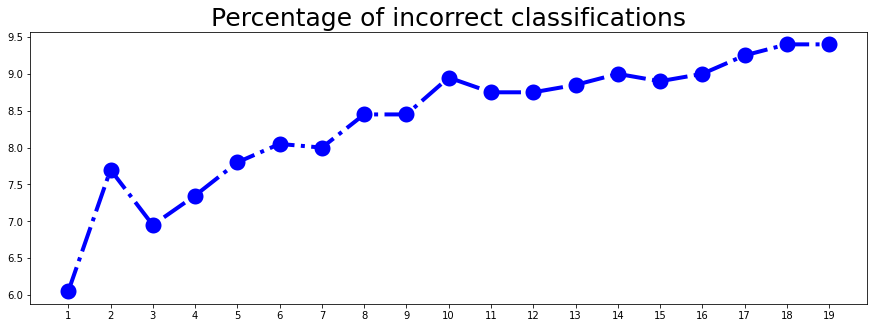

In [19]:
plt.figure(figsize=(15,5))
plt.plot(k_list, pct_incorrect,'bo-.',markeredgewidth=10,linewidth=4)
plt.xticks(k_list)
plt.title('Percentage of incorrect classifications',fontsize=25)

## 4. Testing the classifier

In [31]:
y_test_pred = knn_classifier(3,X,y,X_test, weights='distance')

In [32]:
# percentage of correct classification
100*np.sum(y_test==y_test_pred)/len(y_test)

94.5

In [33]:
'confusion matrix'
n_classes = 10
C = np.zeros((n_classes,n_classes))
for i in range(n_classes):
    for j in range(n_classes):
        C[i,j] = sum(y_test_pred[y_test==i]==j)
C

array([[202.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.],
       [  0., 222.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  2.,   5., 176.,   0.,   0.,   0.,   0.,   0.,   2.,   0.],
       [  0.,   4.,   7., 173.,   0.,   2.,   0.,   3.,   6.,   0.],
       [  0.,   4.,   0.,   0., 185.,   1.,   1.,   0.,   0.,  13.],
       [  1.,   0.,   0.,   3.,   0., 175.,   3.,   0.,   2.,   1.],
       [  2.,   1.,   0.,   0.,   0.,   1., 190.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., 205.,   1.,   4.],
       [  1.,   5.,   0.,   8.,   3.,   0.,   3.,   1., 157.,   5.],
       [  0.,   1.,   0.,   4.,   3.,   1.,   0.,   1.,   0., 205.]])